# sprint2 機械学習スクラッチ入門

# 2.スクラッチ

このSprintでは機械学習手法のスクラッチ課題に取り組む準備を行います。scikit-learnを用いて分類・回帰問題を解くコードを書いておき、今後のSprintではそれと同じ動作をするクラスをスクラッチで作成していきます。

**スクラッチの意義**   
ここでのスクラッチとは、NumPyなどの基本的なライブラリを組み合わせることで、scikit-learnのような応用的なライブラリと同じ機能のクラス・関数を自作することを指します。

スクラッチをすることでscikit-learnなどのライブラリを動かすだけでは掴みづらい、アルゴリズムの深い理解を目指します。コーディングのスキル向上も兼ねますが、それは主な目的ではありません。

以下のような効果を狙っています。
- 新たな手法に出会った時に理論・数式を理解しやすくする
- ライブラリを使う上での曖昧さを減らす
- 既存の実装を読みやすくする

## 【問題1】train_test_splitのスクラッチ
スクラッチの練習として、scikit-learnのtrain_test_splitを自作してみます。以下の雛形をベースとして関数を完成させてください。    sklearn.model_selection.train_test_split — scikit-learn 0.21.3 documentation  
http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html  

なお、作成した関数がscikit-learnのtrain_test_splitと同じ動作をしているか必ず確認をするようにしましょう。

### 1.1.1（解答）

In [1]:
# サンプル数値
import numpy as np
X, y = np.arange(10).reshape((5, 2)), range(5)

In [2]:
def scratch_train_test_split(X, y, train_size=0.8, shuffle = True,  random_state=None ):
    """
    検証データを分割する。

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    y : 次の形のndarray, shape (n_samples, )
      正解値x
    train_size : float (0<train_size<1)
      何割をtrainとするか指定

    Returns
    ----------
    X_train : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    X_test : 次の形のndarray, shape (n_samples, n_features)
      検証データ
    y_train : 次の形のndarray, shape (n_samples, )
      訓練データの正解値
    y_test : 次の形のndarray, shape (n_samples, )
      検証データの正解値
    """
    nd_x = np.array(X)
    nd_y = np.array([y]).reshape(-1,1)
    
#     print(nd_x.shape)
#     print(nd_y.shape)
#     print(nd_y)
    
    con_xy = np.concatenate([nd_x, nd_y], axis=1)
    
    if shuffle == False:
        ran_xy = con_xy
    elif shuffle == True:
        if random_state == None:
            ran_xy = np.random.permutation(con_xy)
        else:
            np.random.seed(seed= random_state)
            ran_xy = np.random.permutation(con_xy)
    
    num = int(len(ran_xy) * train_size)
    
    X_train = ran_xy[:num, :nd_x.shape[1]]
    X_test = ran_xy[num:, :nd_x.shape[1]]
    y_train = ran_xy[:num, nd_x.shape[1]:].ravel()
    y_test = ran_xy[num:, nd_x.shape[1]:].ravel()
    y_train = list(y_train)
    y_test = list(y_test)

    pass
    return X_train, X_test, y_train, y_test

In [3]:
X_train, X_test, y_train, y_test = scratch_train_test_split(X, y, train_size=0.8)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[4 5]
 [2 3]
 [6 7]
 [8 9]]
[[0 1]]
[2, 1, 3, 4]
[0]


## 3.scikit-learnを用いて機械学習を行うコードを作成

scikit-learnを使ったコードを作成していきます。  
検証データの分割には問題1で作成した自作の関数を用いてください。クロスバリデーションではなくホールドアウト法で構いません。

**分類問題**  
分類は3種類の手法をスクラッチします。
- ロジスティック回帰(SGDClassifierクラス)  
   https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier
- SVM  
   https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
- 決定木  
   https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

ロジスティック回帰はscikit-learnにおいてLogisticRegressionクラスとSGDClassifierクラスの2種類から使用できます。ここでは勾配降下法を用いて計算するSGDClassifierクラスを利用してください。引数でloss="log"とすることでロジスティック回帰の計算になります。  

データセットは3種類用意します。  



残り2つは特徴量が2つのデータセットを人工的に用意します。以下のコードで説明変数X,目的変数yが作成可能です。「シンプルデータセット1」「シンプルデータセット2」とします。特徴量が2つであるため可視化が容易です。

## 【問題2】 分類問題を解くコードの作成
上記3種類の手法で3種類のデータセットを学習・推定するコードを作成してください。

### 2.1.1（課題）   
1つ目は事前学習期間同様にirisデータセットです。  
sklearn.datasets.load_iris — scikit-learn 0.20.2 documentation  
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html

2値分類としたいため、以下の2つの目的変数のみ利用します。特徴量は4種類全て使います。  
virgicolorとvirginica

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [5]:
# 読み込み
from sklearn.datasets import load_iris
iris_dataset = load_iris()
iris_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
# 準備

# 得微量
data_x = pd.DataFrame(iris_dataset["data"])
data_x.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

#targetを読み込み、値を品種に変更。
data_y = pd.DataFrame(iris_dataset["target"])
data_y.columns = ["target"]

#1つのデータに結合、不要な要素を削除する。
data_xy = pd.concat([data_x, data_y], axis=1) 
df = data_xy[data_xy["target"] != 0]

print(df.head(3))
print(df.tail(3))

    sepal_length  sepal_width  petal_length  petal_width  target
50           7.0          3.2           4.7          1.4       1
51           6.4          3.2           4.5          1.5       1
52           6.9          3.1           4.9          1.5       1
     sepal_length  sepal_width  petal_length  petal_width  target
147           6.5          3.0           5.2          2.0       2
148           6.2          3.4           5.4          2.3       2
149           5.9          3.0           5.1          1.8       2


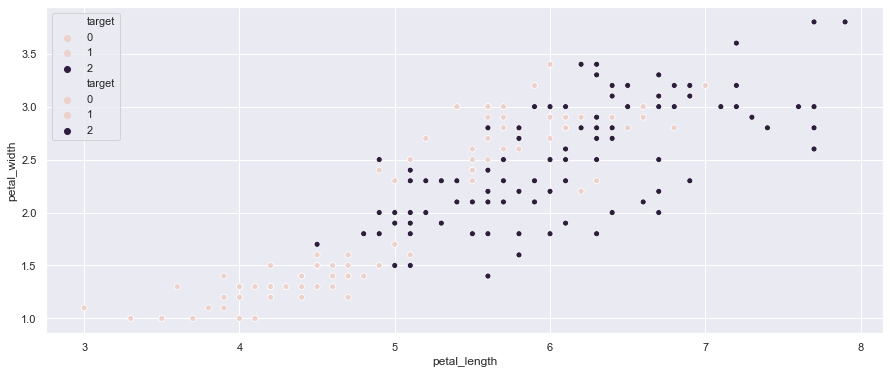

In [7]:
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(1,1,1)
ax1 = sns.scatterplot("sepal_length","sepal_width", data = df, hue = df["target"])
ax1 = sns.scatterplot("petal_length", "petal_width", data = df, hue = df["target"])

In [8]:
# 分割

data = np.array(df)

X_train, X_test, y_train, y_test = scratch_train_test_split(data[:,:4], data[:,4:], train_size=0.8, shuffle = True,  random_state=0)
print(f"X_trainの訓練データ: {X_train.shape[0]} X_trainの特微量: {X_train.shape[1]} X_trainの値: {X_train[0]}")
print(f"X_testの訓練データ : {X_test.shape[0]} X_testの特微量 : {X_test.shape[1]} X_testの値 : {X_test[0]}")
print(f"y_trainの訓練データ: {len(y_train)} X_trainの特微量: 1 y_train値(10個): {y_train[:10]}")
print(f"y_testの訓練データ : {len(y_test)} X_testの特微量 : 1 y_testの値（10個）: {y_test[:10]}")

X_trainの訓練データ: 80 X_trainの特微量: 4 X_trainの値: [6.8 2.8 4.8 1.4]
X_testの訓練データ : 20 X_testの特微量 : 4 X_testの値 : [6.6 3.  4.4 1.4]
y_trainの訓練データ: 80 X_trainの特微量: 1 y_train値(10個): [1.0, 2.0, 1.0, 2.0, 2.0, 2.0, 1.0, 2.0, 2.0, 2.0]
y_testの訓練データ : 20 X_testの特微量 : 1 y_testの値（10個）: [1.0, 1.0, 2.0, 1.0, 1.0, 2.0, 2.0, 1.0, 2.0, 2.0]


In [9]:
# 標準化

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train) 
X_train_std = scaler.transform(X_train) 
X_test_std = scaler.transform(X_test)
print(f"データ数：{X_train.shape} X_test初期値:{X_test[0]} X_test変換値:{X_test_std[0]}")

データ数：(80, 4) X_test初期値:[6.6 3.  4.4 1.4] X_test変換値:[ 0.5314968   0.42944906 -0.62190048 -0.65921772]


### 2.1.2（解答）ロジスティック回帰(SGDClassifierクラス)

In [10]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(loss="log",max_iter=1000, tol=1e-3)
clf = clf.fit(X_train_std, y_train)
y_pred = clf.predict(X_test_std)
clf_score = clf.score(X_test_std, y_test)
print(f"データ数：{X_train.shape} X_test初期値:{X_test[0]} X_test変換値:{X_test_std[0]}")
print(f"予測値:{y_pred}")
print(f"正解率:{clf_score}")

データ数：(80, 4) X_test初期値:[6.6 3.  4.4 1.4] X_test変換値:[ 0.5314968   0.42944906 -0.62190048 -0.65921772]
予測値:[1. 1. 2. 1. 1. 2. 2. 1. 1. 2. 2. 1. 1. 1. 1. 2. 2. 2. 1. 1.]
正解率:0.9


### 2.1.2（解答）SVM

In [11]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', C=1.0)
svm = svm.fit(X_train_std, y_train)
y_pred = svm.predict(X_test_std)
svm_score = svm.score(X_test_std, y_test)
print(f"データ数：{X_train.shape} X_test初期値:{X_test[0]} X_test変換値:{X_test_std[0]}")
print(f"予測値:{y_pred}")
print(f"正解率:{svm_score}")

データ数：(80, 4) X_test初期値:[6.6 3.  4.4 1.4] X_test変換値:[ 0.5314968   0.42944906 -0.62190048 -0.65921772]
予測値:[1. 1. 2. 1. 1. 2. 2. 1. 2. 2. 2. 1. 1. 1. 1. 2. 2. 2. 1. 1.]
正解率:0.95


### 2.1.2（解答）決定木

In [12]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=3)
tree = tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
tree_score = tree.score(X_test, y_test)
print(f"データ数：{X_train.shape} X_test初期値:{X_test[0]} X_test変換値:{X_test_std[0]}")
print(f"予測値:{y_pred}")
print(f"正解率:{tree_score}")

データ数：(80, 4) X_test初期値:[6.6 3.  4.4 1.4] X_test変換値:[ 0.5314968   0.42944906 -0.62190048 -0.65921772]
予測値:[1. 1. 2. 1. 1. 2. 2. 1. 1. 2. 2. 1. 1. 1. 1. 2. 2. 2. 1. 1.]
正解率:0.9


### 2.2.1（課題）
2つ目は下記、シンプルデータセット1トです。

In [13]:
# シンプルデータセット1作成コード
import numpy as np
np.random.seed(seed=0)
n_samples = 500
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]
f0 = np.random.multivariate_normal(f0, cov, int(n_samples/2))
f1 = np.random.multivariate_normal(f1, cov, int(n_samples/2))
X = np.concatenate((f0, f1))
y = np.concatenate((np.ones((int(n_samples/2))), np.ones((int(n_samples/2))) *(-1))).astype(np.int)
random_index = np.random.permutation(np.arange(n_samples))
X = X[random_index]
y = y[random_index]

In [14]:
# 分割

data = np.array(df)

X_train, X_test, y_train, y_test = scratch_train_test_split(X, y, train_size=0.8, shuffle = True,  random_state=0)
print(f"X_trainの訓練データ: {X_train.shape[0]} X_trainの特微量: {X_train.shape[1]} X_trainの値: {X_train[0]}")
print(f"X_testの訓練データ : {X_test.shape[0]} X_testの特微量 : {X_test.shape[1]} X_testの値 : {X_test[0]}")
print(f"y_trainの訓練データ: {len(y_train)} X_trainの特微量: 1 y_train値(10個): {y_train[:10]}")
print(f"y_testの訓練データ : {len(y_test)} X_testの特微量 : 1 y_testの値（10個）: {y_test[:10]}")

X_trainの訓練データ: 400 X_trainの特微量: 2 X_trainの値: [3.63463384 0.82664981]
X_testの訓練データ : 100 X_testの特微量 : 2 X_testの値 : [ 2.51343386 -0.8541926 ]
y_trainの訓練データ: 400 X_trainの特微量: 1 y_train値(10個): [-1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0]
y_testの訓練データ : 100 X_testの特微量 : 1 y_testの値（10個）: [-1.0, -1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0, 1.0, 1.0]


In [15]:
# 標準化

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train) 
X_train_std = scaler.transform(X_train) 
X_test_std = scaler.transform(X_test)
print(f"データ数：{X_train.shape} X_test初期値:{X_test[0]} X_test変換値:{X_test_std[0]}")

データ数：(400, 2) X_test初期値:[ 2.51343386 -0.8541926 ] X_test変換値:[ 1.12683737 -0.81625467]


### 2.2.2（解答）ロジスティック回帰(SGDClassifierクラス)

In [16]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(loss="log",max_iter=1000, tol=1e-3)
clf = clf.fit(X_train_std, y_train)
y_pred = clf.predict(X_test_std)
clf_score = clf.score(X_test_std, y_test)
print(f"データ数：{X_train.shape} X_test初期値:{X_test[0]} X_test変換値:{X_test_std[0]}")
print(f"予測値:{y_pred}")
print(f"正解率:{clf_score}")

データ数：(400, 2) X_test初期値:[ 2.51343386 -0.8541926 ] X_test変換値:[ 1.12683737 -0.81625467]
予測値:[-1. -1.  1.  1.  1. -1. -1. -1.  1.  1.  1. -1. -1. -1.  1.  1.  1.  1.
  1. -1.  1.  1.  1.  1.  1. -1. -1.  1.  1. -1.  1.  1. -1. -1.  1. -1.
 -1. -1. -1.  1. -1.  1.  1. -1. -1.  1.  1.  1. -1. -1.  1. -1. -1. -1.
  1. -1.  1. -1. -1. -1. -1. -1.  1. -1.  1. -1. -1. -1. -1.  1.  1. -1.
 -1. -1. -1. -1. -1.  1. -1. -1. -1. -1. -1.  1. -1. -1.  1.  1.  1. -1.
  1. -1. -1. -1.  1.  1. -1.  1.  1. -1.]
正解率:1.0


### 2.3.2（解答）SVM

In [17]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', C=1.0)
svm = svm.fit(X_train_std, y_train)
y_pred1 = svm.predict(X_test_std)
svm_score1 = svm.score(X_test_std, y_test)
print(f"データ数：{X_train.shape} X_test初期値:{X_test[0]} X_test変換値:{X_test_std[0]}")
print(f"予測値:{y_pred}")
print(f"正解率:{svm_score}")

データ数：(400, 2) X_test初期値:[ 2.51343386 -0.8541926 ] X_test変換値:[ 1.12683737 -0.81625467]
予測値:[-1. -1.  1.  1.  1. -1. -1. -1.  1.  1.  1. -1. -1. -1.  1.  1.  1.  1.
  1. -1.  1.  1.  1.  1.  1. -1. -1.  1.  1. -1.  1.  1. -1. -1.  1. -1.
 -1. -1. -1.  1. -1.  1.  1. -1. -1.  1.  1.  1. -1. -1.  1. -1. -1. -1.
  1. -1.  1. -1. -1. -1. -1. -1.  1. -1.  1. -1. -1. -1. -1.  1.  1. -1.
 -1. -1. -1. -1. -1.  1. -1. -1. -1. -1. -1.  1. -1. -1.  1.  1.  1. -1.
  1. -1. -1. -1.  1.  1. -1.  1.  1. -1.]
正解率:0.95


### 2.2.2（解答）決定木

In [18]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=3)
tree = tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
tree_score = tree.score(X_test, y_test)
print(f"データ数：{X_train.shape} X_test初期値:{X_test[0]} X_test変換値:{X_test_std[0]}")
print(f"予測値:{y_pred}")
print(f"正解率:{tree_score}")

データ数：(400, 2) X_test初期値:[ 2.51343386 -0.8541926 ] X_test変換値:[ 1.12683737 -0.81625467]
予測値:[-1. -1.  1.  1.  1. -1. -1. -1.  1.  1.  1. -1. -1. -1.  1.  1.  1.  1.
  1. -1.  1.  1.  1.  1.  1. -1. -1.  1.  1. -1.  1.  1. -1. -1.  1. -1.
 -1. -1. -1.  1. -1.  1.  1. -1. -1.  1.  1.  1. -1. -1.  1. -1. -1. -1.
  1. -1.  1. -1. -1. -1. -1. -1.  1. -1.  1. -1. -1. -1. -1.  1.  1. -1.
 -1. -1. -1. -1. -1.  1. -1. -1. -1. -1. -1.  1. -1. -1.  1.  1.  1. -1.
  1. -1. -1. -1.  1.  1. -1.  1.  1. -1.]
正解率:1.0


### 2.3.1（課題）
3つ目は下記、シンプルデータセット2トです。

In [19]:
# シンプルデータセット2作成コード
X = np.array([[-0.44699 , -2.8073  ],[-1.4621  , -2.4586  ],
       [ 0.10645 ,  1.9242  ],[-3.5944  , -4.0112  ],
       [-0.9888  ,  4.5718  ],[-3.1625  , -3.9606  ],
       [ 0.56421 ,  0.72888 ],[-0.60216 ,  8.4636  ],
       [-0.61251 , -0.75345 ],[-0.73535 , -2.2718  ],
       [-0.80647 , -2.2135  ],[ 0.86291 ,  2.3946  ],
       [-3.1108  ,  0.15394 ],[-2.9362  ,  2.5462  ],
       [-0.57242 , -2.9915  ],[ 1.4771  ,  3.4896  ],
       [ 0.58619 ,  0.37158 ],[ 0.6017  ,  4.3439  ],
       [-2.1086  ,  8.3428  ],[-4.1013  , -4.353   ],
       [-1.9948  , -1.3927  ],[ 0.35084 , -0.031994],
       [ 0.96765 ,  7.8929  ],[-1.281   , 15.6824  ],
       [ 0.96765 , 10.083   ],[ 1.3763  ,  1.3347  ],
       [-2.234   , -2.5323  ],[-2.9452  , -1.8219  ],
       [ 0.14654 , -0.28733 ],[ 0.5461  ,  5.8245  ],
       [-0.65259 ,  9.3444  ],[ 0.59912 ,  5.3524  ],
       [ 0.50214 , -0.31818 ],[-3.0603  , -3.6461  ],
       [-6.6797  ,  0.67661 ],[-2.353   , -0.72261 ],
       [ 1.1319  ,  2.4023  ],[-0.12243 ,  9.0162  ],
       [-2.5677  , 13.1779  ],[ 0.057313,  5.4681  ]])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [20]:
# 分割

data = np.array(df)

X_train, X_test, y_train, y_test = scratch_train_test_split(X, y, train_size=0.8, shuffle = True,  random_state=0)
print(f"X_trainの訓練データ: {X_train.shape[0]} X_trainの特微量: {X_train.shape[1]} X_trainの値: {X_train[0]}")
print(f"X_testの訓練データ : {X_test.shape[0]} X_testの特微量 : {X_test.shape[1]} X_testの値 : {X_test[0]}")
print(f"y_trainの訓練データ: {len(y_train)} X_trainの特微量: 1 y_train値(10個): {y_train[:10]}")
print(f"y_testの訓練データ : {len(y_test)} X_testの特微量 : 1 y_testの値（10個）: {y_test[:10]}")

X_trainの訓練データ: 32 X_trainの特微量: 2 X_trainの値: [0.96765 7.8929 ]
X_testの訓練データ : 8 X_testの特微量 : 2 X_testの値 : [0.56421 0.72888]
y_trainの訓練データ: 32 X_trainの特微量: 1 y_train値(10個): [1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0]
y_testの訓練データ : 8 X_testの特微量 : 1 y_testの値（10個）: [0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]


In [21]:
# 標準化

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train) 
X_train_std = scaler.transform(X_train) 
X_test_std = scaler.transform(X_test)
print(f"データ数：{X_train.shape} X_test初期値:{X_test[0]} X_test変換値:{X_test_std[0]}")

データ数：(32, 2) X_test初期値:[0.56421 0.72888] X_test変換値:[ 0.77600563 -0.35956792]


### 2.3.2（解答）ロジスティック回帰(SGDClassifierクラス)

In [22]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(loss="log",max_iter=1000, tol=1e-3)
clf = clf.fit(X_train_std, y_train)
y_pred = clf.predict(X_test_std)
clf_score = clf.score(X_test_std, y_test)
print(f"データ数：{X_train.shape} X_test初期値:{X_test[0]} X_test変換値:{X_test_std[0]}")
print(f"予測値:{y_pred}")
print(f"正解率:{clf_score}")

データ数：(32, 2) X_test初期値:[0.56421 0.72888] X_test変換値:[ 0.77600563 -0.35956792]
予測値:[0. 1. 0. 0. 0. 1. 0. 0.]
正解率:0.875


### 2.3.2（解答）SVM

In [23]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', C=1.0)
svm = svm.fit(X_train_std, y_train)
y_pred1 = svm.predict(X_test_std)
svm_score1 = svm.score(X_test_std, y_test)
print(f"データ数：{X_train.shape} X_test初期値:{X_test[0]} X_test変換値:{X_test_std[0]}")
print(f"予測値:{y_pred}")
print(f"正解率:{svm_score}")

データ数：(32, 2) X_test初期値:[0.56421 0.72888] X_test変換値:[ 0.77600563 -0.35956792]
予測値:[0. 1. 0. 0. 0. 1. 0. 0.]
正解率:0.95


### 2.3.2（解答）決定木

In [24]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=3)
tree = tree.fit(X_train_std, y_train)
y_pred = tree.predict(X_test_std)
tree_score = tree.score(X_test_std, y_test)
print(f"データ数：{X_train.shape} X_test初期値:{X_test[0]} X_test変換値:{X_test_std[0]}")
print(f"予測値:{y_pred}")
print(f"正解率:{tree_score}")

データ数：(32, 2) X_test初期値:[0.56421 0.72888] X_test変換値:[ 0.77600563 -0.35956792]
予測値:[0. 1. 0. 1. 0. 1. 1. 0.]
正解率:0.625


# 【問題3】 回帰問題を解くコードの作成
線形回帰でHouse Pricesデータセットを学習・推定するコードを作成してください。

## 回帰問題
回帰は1種類をスクラッチします。

- 線形回帰(SGDRegressorクラス)
   https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html

データセットは事前学習期間同様にHouse Pricesコンペティションのものを使います。  
House Prices: Advanced Regression Techniques  
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data  
train.csvをダウンロードし、目的変数としてSalePrice、説明変数として、GrLivAreaとYearBuiltを使います。

In [31]:
data_master = pd.read_csv("sample_dataset/house-prices-advanced-regression-techniques/train.csv")
pf_master = pd.DataFrame(data_master)
pf = pf_master[['GrLivArea', 'YearBuilt',"SalePrice"]]
pf.head()

,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000


In [33]:
# 欠損値の確認
print(pf.isnull().sum())

GrLivArea    0
YearBuilt    0
SalePrice    0
dtype: int64


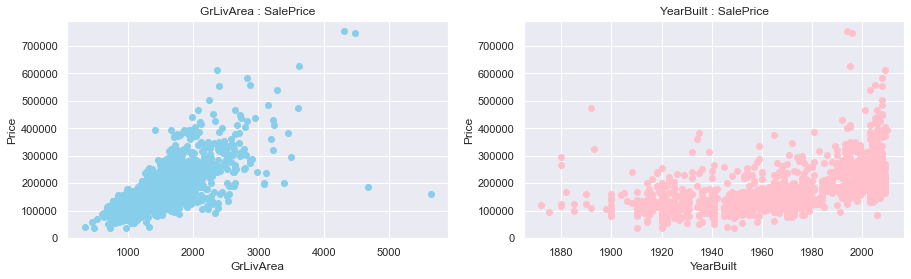

In [36]:
# 分析
fig = plt.figure(figsize=(15, 4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.scatter(pf['GrLivArea'], pf['SalePrice'], color="skyblue")
ax1.set_title("GrLivArea : SalePrice")
ax1.set_xlabel("GrLivArea")
ax1.set_ylabel("Price")
ax1.grid(True)

ax2.scatter(pf['YearBuilt'], pf['SalePrice'], color="pink")
ax2.set_title("YearBuilt : SalePrice")
ax2.set_xlabel("YearBuilt")
ax2.set_ylabel("Price")
ax2.grid(True)

In [41]:
# 分割

data = np.array(pf)
X = np.array(data[:,:2])
y = np.array(data[:,2:])

X_train, X_test, y_train, y_test = scratch_train_test_split(X, y, train_size=0.8, shuffle = True,  random_state=0)
print(f"X_trainの訓練データ: {X_train.shape[0]} X_trainの特微量: {X_train.shape[1]} X_trainの値: {X_train[0]}")
print(f"X_testの訓練データ : {X_test.shape[0]} X_testの特微量 : {X_test.shape[1]} X_testの値 : {X_test[0]}")
print(f"y_trainの訓練データ: {len(y_train)} X_trainの特微量: 1 y_train値(10個): {y_train[:10]}")
print(f"y_testの訓練データ : {len(y_test)} X_testの特微量 : 1 y_testの値（10個）: {y_test[:10]}")

X_trainの訓練データ: 1168 X_trainの特微量: 2 X_trainの値: [2515 1957]
X_testの訓練データ : 292 X_testの特微量 : 2 X_testの値 : [1964 1976]
y_trainの訓練データ: 1168 X_trainの特微量: 1 y_train値(10個): [200624, 133000, 110000, 192000, 88000, 85000, 282922, 141000, 745000, 148800]
y_testの訓練データ : 292 X_testの特微量 : 1 y_testの値（10個）: [205000, 96500, 130000, 250000, 133900, 80500, 135000, 152000, 152000, 100000]


In [47]:
np.array(y_train).reshape(-1,1)

array([[200624],
       [133000],
       [110000],
       ...,
       [133000],
       [222500],
       [162500]])

In [59]:
# 標準化
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train) 
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

y_train_nd = np.array(y_train).reshape(-1,1)
y_test_nd = np.array(y_test).reshape(-1,1)

scaler2 = StandardScaler()
scaler2.fit(y_train_nd) 
y_train_std = scaler2.transform(y_train_nd)
y_test_std = scaler2.transform(y_test_nd)

print(f"Xデータ数：{X_train.shape} X_test初期値:{X_test[0]} X_test変換値:{X_test_std[0]}")
print(f"yデータ数：{len(y_train)} y_test初期値:{y_test_nd[0]} y_test変換値:{y_test_std[0]}")

Xデータ数：(1168, 2) X_test初期値:[1964 1976] X_test変換値:[0.81257343 0.15587731]
yデータ数：1168 y_test初期値:[205000] y_test変換値:[0.2645713]


In [65]:
from sklearn.linear_model import SGDRegressor

reg = SGDRegressor(max_iter=1000, tol=1e-3)
reg = reg.fit(X_train_std, y_train_std.ravel())
y_pred = reg.predict(X_test_std)
reg_score = reg.score(X_test_std, y_test_std)

X_test_tf = scaler.inverse_transform(X_test_std)
y_pred_tf = scaler2.inverse_transform(y_pred)

print(f"データ数：{X_train.shape} X_test初期値:{X_test[0]} X_test変換値:{X_test_std[0]} X_test復元後:{X_test_tf[0]}")
print(f"予測値:{y_pred[0]} y_pred復元値:{y_pred_tf[0]}")
print(f"正解率:{clf_score}")

データ数：(1168, 2) X_test初期値:[1964 1976] X_test変換値:[0.81257343 0.15587731] X_test復元後:[1964. 1976.]
予測値:0.5707031787890045 y_pred復元値:229907.06458659732
正解率:0.875


In [99]:
# GrLivArea線形モデル
from sklearn.linear_model import LinearRegression
x_plot = SGDRegressor(max_iter=1000, tol=1e-3)
x_plot.fit(X_train_std[:,0].reshape(-1,1), y_train_std.ravel()) # 線形モデルの重みを学習
print('coefficient = ', x_ploｔ.coef_[0]) # 説明変数の係数を出力
print('intercept = ', x_plot.intercept_) # 切片を出力

# YearBuilt線形モデル
y_plot = SGDRegressor(max_iter=1000, tol=1e-3)
y_plot.fit(X_train_std[:,1].reshape(-1,1), y_train_std.ravel()) # 線形モデルの重みを学習
print('coefficient = ', y_ploｔ.coef_[0]) # 説明変数の係数を出力
print('intercept = ', y_plot.intercept_) # 切片を出力

coefficient =  0.7186932560379294
intercept =  [-0.0028596]
coefficient =  0.5209543593246673
intercept =  [-0.00725106]


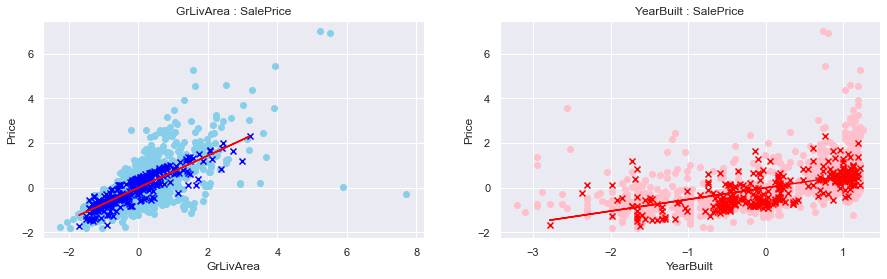

In [105]:
# 分析
fig = plt.figure(figsize=(15, 4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.scatter(X_train_std[:,0], y_train_std, color="skyblue")
ax1.scatter(X_test_std[:,0], y_pred, color="blue", marker="x")
ax1.plot(X_test_std[:,0], x_plot.predict(X_test_std[:,0].reshape(-1,1)), color = 'red') 
ax1.set_title("GrLivArea : SalePrice")
ax1.set_xlabel("GrLivArea")
ax1.set_ylabel("Price")
ax1.grid(True)

ax2.scatter(X_train_std[:,1], y_train_std, color="pink")
ax2.scatter(X_test_std[:,1], y_pred, color="red", marker="x")
ax2.plot(X_test_std[:,1], y_plot.predict(X_test_std[:,1].reshape(-1,1)), color = 'red') 
ax2.set_title("YearBuilt : SalePrice")
ax2.set_xlabel("YearBuilt")
ax2.set_ylabel("Price")
ax2.grid(True)